#                                COMPUTER VISION (P21DS3:4)

# P.MUTHULAKSHMI__215229124

# ASSIGNMENT__2

# Comparing various edge detection technqiues 

In [108]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [109]:
original_img = cv2.imread('Taj_mahal_hotel.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray,(3,3),0)

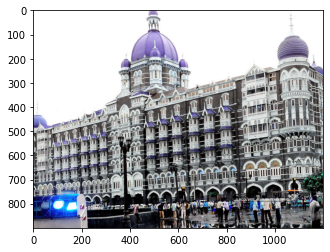

In [110]:
plt.imshow(original_img)

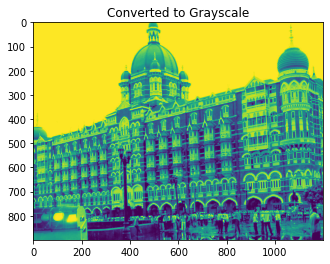

In [111]:
plt.imshow(blur_img)
plt.title("Converted to Grayscale")
plt.show()

# Gaussian-based edge detection techniques

# 1.Canny edge detector

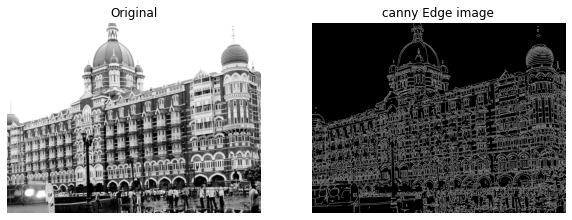

In [112]:
edges = cv2.Canny(image=blur_img, threshold1=100, threshold2=200)
 
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(blur_img, cmap='gray')
plt.title('Original') 
plt.axis("off")
 
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('canny Edge image')
plt.axis("off")
plt.show()

# 2.Laplacian edge detector loG

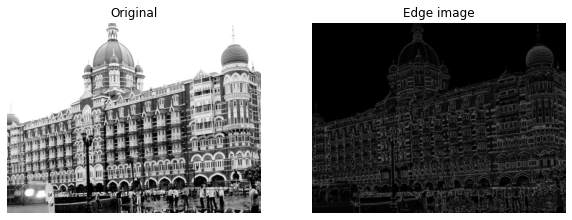

In [113]:
laplacian = cv2.Laplacian(blur_img,5,cv2.CV_64F)
filtered_image = cv2.convertScaleAbs(laplacian)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(blur_img, cmap='gray')
plt.title('Original') 
plt.axis("off")
 
plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('Edge image')
plt.axis("off")
plt.show()

# gradient-based edge detector

# 3.Sobel edge detector

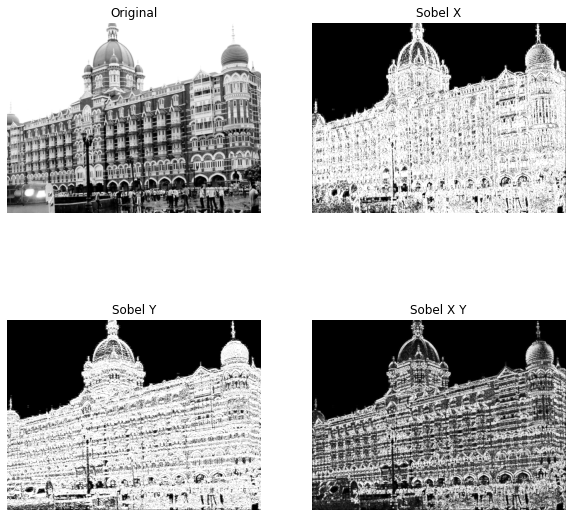

In [114]:
sobelx = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
filtered_image_x = cv2.convertScaleAbs(sobelx)
 
sobely = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
filtered_image_y = cv2.convertScaleAbs(sobely)
 
sobelxy = cv2.Sobel(src=blur_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
filtered_image_xy = cv2.convertScaleAbs(sobelxy)
 
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(blur_img, cmap='gray')
plt.title('Original') 
plt.axis("off")
 
plt.subplot(222)
plt.imshow(filtered_image_x, cmap='gray')
plt.title('Sobel X') 
plt.axis("off")
 
plt.subplot(223)
plt.imshow(filtered_image_y, cmap='gray')
plt.title('Sobel Y') 
plt.axis("off")
 
plt.subplot(224)
plt.imshow(filtered_image_xy, cmap='gray')
plt.title('Sobel X Y')
plt.axis("off")
plt.show()

# 4. Prewitt edge detector

In [115]:
import cv2
import numpy as np

img = cv2.imread('Taj_mahal_hotel.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

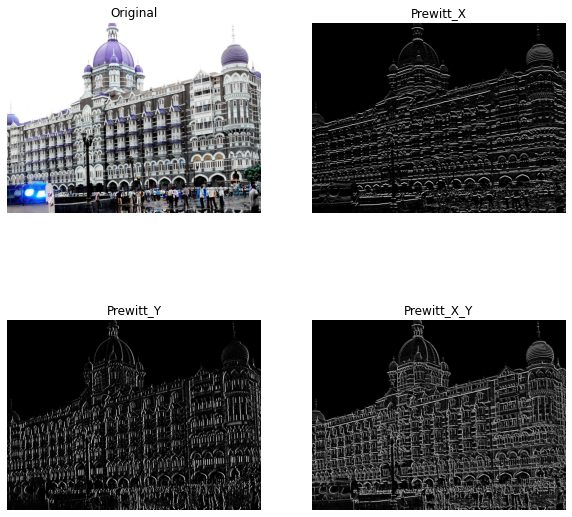

In [116]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Original') 
plt.axis("off")
 
plt.subplot(222)
plt.imshow(img_prewittx, cmap='gray')
plt.title('Prewitt_X') 
plt.axis("off")
 
plt.subplot(223)
plt.imshow(img_prewitty, cmap='gray')
plt.title('Prewitt_Y') 
plt.axis("off")
 
plt.subplot(224)
plt.imshow(img_prewittx + img_prewitty, cmap='gray')
plt.title('Prewitt_X_Y')
plt.axis("off")
plt.show()

### 5.Roberts Edge Detection

In [117]:
import cv2
import numpy as np
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0 ],[0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],[ -1, 0 ]] )

img = cv2.imread("Taj_mahal_hotel.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)


True

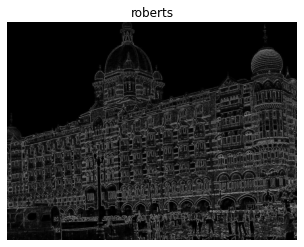

In [118]:
plt.imshow(edged_img, cmap='gray')
plt.title('roberts')
plt.axis("off")
plt.show()

### 6 Difference of Gaussian (DoG)

In [119]:
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import math

In [120]:
def plot_input(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()
    
def handle_img_padding(img1, img2):
    M1, N1 = img1.shape[:2]
    M2, N2 = img2.shape[:2]
    padding_x = np.abs(M2 - M1)/2
    padding_y = np.abs(N2 - N1)/2
    img2 = img2[padding_x:M1+padding_x, padding_y: N1+padding_y]
    return img2

In [121]:
original_img = cv2.imread('Taj_mahal_hotel.jpg',cv2.IMREAD_COLOR)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[150, 140, 140],
        [158, 148, 148],
        [158, 148, 148],
        ...,
        [ 15,  21,  20],
        [  0,   1,   0],
        [  8,  14,  13]],

       [[150, 140, 140],
        [154, 144, 144],
        [151, 141, 141],
        ...,
        [  7,  13,  12],
        [  0,   1,   0],
        [  3,   9,   8]],

       [[151, 141, 141],
        [150, 140, 140],
        [144, 134, 134],
        ...,
        [  1,   6,   5],
        [  1,   6,   5],
        [  1,   6,   5]]

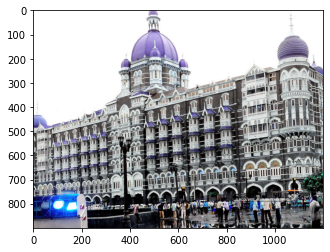

In [122]:
plt.imshow(original_img)
original_img

(-0.5, 1199.5, 899.5, -0.5)

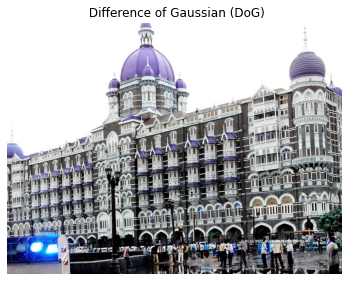

In [123]:
plt.figure(figsize=(6,6))
plt.imshow(original_img, cmap='gray')
plt.title(' Difference of Gaussian (DoG)') 
plt.axis("off")

### 7.KRISH_OPERATOR_IN_8_DIRECTIONS

In [169]:
import numpy as np
import  cv2 as cv
from matplotlib import pyplot as plt

In [173]:
krish_imge = cv.imread('download.png')

In [174]:
krish_imge.shape

(235, 235, 3)

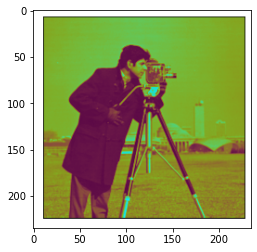

In [175]:
plt.imshow(krish_imge)

EAST DIRECTION

In [128]:
import scipy
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

In [143]:
e_k = np.zeros_like(krish_imge)

In [144]:
ka= np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])

In [147]:
e_k=ndimage.convolve(krish_imge,ka,mode='nearest',cval=0.0)

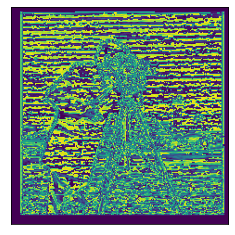

In [148]:
plt.imshow(e_k)
plt.xticks([]),plt.yticks([])
plt.show()

In [149]:
s_k = np.zeros_like(img)
n_k = np.zeros_like(img)
nw_k = np.zeros_like(img)
ne_k = np.zeros_like(img)
sw_k = np.zeros_like(img)
se_k = np.zeros_like(img)
w_k = np.zeros_like(img)

In [150]:
na= np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
wa= np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
sa= np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
nea= np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])
nwa= np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
sea= np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
swa= np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])

In [153]:
n_k=ndimage.convolve(krish_imge,na,mode='nearest',cval=0.0)
s_k=ndimage.convolve(krish_imge,sa,mode='nearest',cval=0.0)
w_k=ndimage.convolve(krish_imge,wa,mode='nearest',cval=0.0)
ne_k=ndimage.convolve(krish_imge,nea,mode='nearest',cval=0.0)
nw_k=ndimage.convolve(krish_imge,nwa,mode='nearest',cval=0.0)
se_k=ndimage.convolve(krish_imge,sea,mode='nearest',cval=0.0)
sw_k=ndimage.convolve(krish_imge,swa,mode='nearest',cval=0.0)

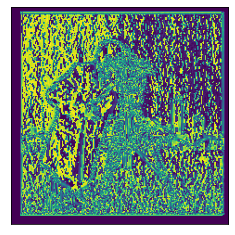

In [154]:
plt.imshow(n_k)
plt.xticks([]),plt.yticks([])
plt.show()

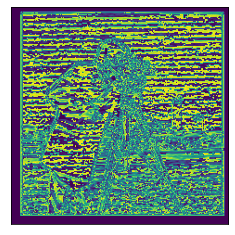

In [155]:
#NORTH

plt.imshow(w_k)
plt.xticks([]),plt.yticks([])
plt.show()

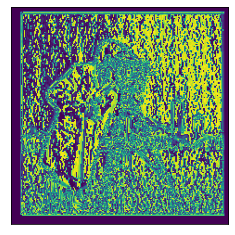

In [156]:
#WEST

plt.imshow(s_k)
plt.xticks([]),plt.yticks([])
plt.show()


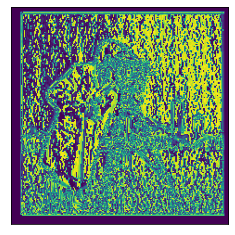

In [157]:
#WEST

plt.imshow(s_k)
plt.xticks([]),plt.yticks([])
plt.show()

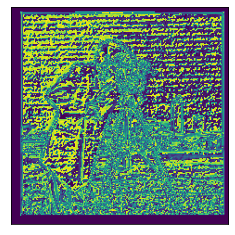

In [158]:
#SOUTH

plt.imshow(ne_k)
plt.xticks([]),plt.yticks([])
plt.show()

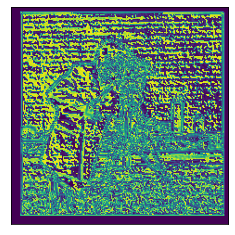

In [159]:
#NORTH-EAST

plt.imshow(nw_k)
plt.xticks([]),plt.yticks([])
plt.show()

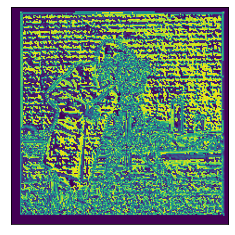

In [160]:
#NORTH-WEST

plt.imshow(se_k)
plt.xticks([]),plt.yticks([])
plt.show()

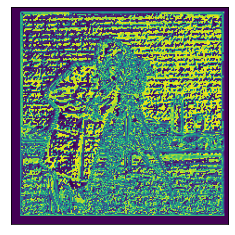

In [161]:
#SOUTH-EAST

plt.imshow(sw_k)
plt.xticks([]),plt.yticks([])
plt.show()

In [162]:
#SOUTH-WEST

t_ew=np.add(e_k,w_k)

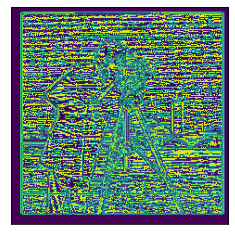

In [163]:
plt.imshow(t_ew)
plt.xticks([]),plt.yticks([])
plt.show()

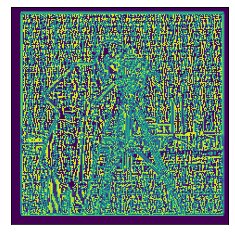

In [164]:
#EAST+WEST

t_ns=np.add(n_k,s_k)
plt.imshow(t_ns)
plt.xticks([]),plt.yticks([])
plt.show()

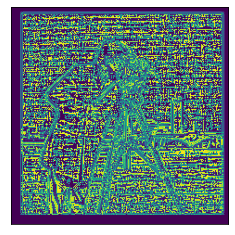

In [165]:
#NORTH+SOUTH

t_news=np.add(t_ns,t_ew)
plt.imshow(t_news)
plt.xticks([]),plt.yticks([])
plt.show()

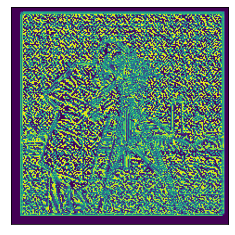

In [166]:
#NORTH+EAST+SOUTH+WEST

t_nesw=np.add(ne_k,sw_k)
plt.imshow(t_nesw)
plt.xticks([]),plt.yticks([])
plt.show()

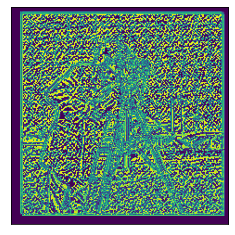

In [167]:
#NORTH-EAST+SOUTH-WEST

t_nwse=np.add(nw_k,se_k)
plt.imshow(t_nwse)
plt.xticks([]),plt.yticks([])
plt.show()

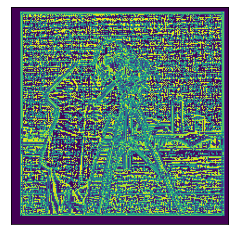

In [168]:
#NORTH-WEST+SOUTH-EAST

t_fi=np.add(t_nwse,t_nesw)
plt.imshow(t_fi)
plt.xticks([]),plt.yticks([])
plt.show()